<a href="https://colab.research.google.com/github/aaravpanchal/EDA-on-Airbnb-NYC-2019-Database/blob/main/EDA_AIRBNB_NYC_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

EDA Learnings : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

Data Loading

In [1]:
#importing libraries for our analysis
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [2]:
#lets load the data
from google.colab import drive
drive.mount('/content/drive')

airbnb_df=pd.read_csv('/content/drive/MyDrive/Airbnb NYC 2019.csv')


Mounted at /content/drive


We have laoded the data, lets analyse type of data we have breifly to get a better idea before staring complex analysis

In [3]:
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
airbnb_df[airbnb_df["price"]<100].shape

(21877, 16)

DATA WRANGLING

We got an idea of data, now lets do some basic manupulation of data to structure our data well to do further analysis. Here, we are removing duplicate rows if exists, handling null values of desired columns and droping  undesired columns by framing a new dataframe as newdf.

In [4]:
#removing duplicates
newdf=airbnb_df.drop_duplicates()
#replacing missing values 
newdf.fillna({'reviews_per_month':0}, inplace=True)
#removing uneccesorry columns
newdf.drop(['id','last_review'],axis=1, inplace=True)
#replacing zero values of price with mean of price
newdf[newdf["price"]==0]=newdf["price"].mean()

In [ ]:
#lets check our new df
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  float64
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  float64
 9   minimum_nights                  48895 non-null  float64
 10  number_of_reviews               48895 non-null  float64
 11  reviews_per_month               48895 non-null  float64
 12  calculated_host_listings_count  

In [ ]:
newdf.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.760682e+07,40.754148,-73.901181,152.755045,7.062663,23.301113,1.124913,7.177379,112.788484
std,7.861436e+07,1.680484,3.399846,240.143242,20.625976,44.588604,2.778835,33.024726,131.613827
min,1.527207e+02,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.808072e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.078236e+07,40.723090,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763135,-73.936265,175.000000,5.000000,24.000000,1.585000,2.000000,227.000000
max,2.743213e+08,152.720687,152.720687,10000.000000,1250.000000,629.000000,152.720687,327.000000,365.000000


While analysing, we found out there are some currepted rows, which have same values, we have to remove them for better structure.

In [6]:
print(newdf["neighbourhood_group"].unique())
newdf.drop(newdf[newdf["neighbourhood_group"]==152.7206871868289].index,inplace=True)

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx' 152.7206871868289]


In [7]:
newdf["neighbourhood_group"].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

DATA VISUALIZATION


Now our Data is clean and ready to be used for some deep analysis using data visualization 

lets check the percentage share of rooms in different neighboorhood groups

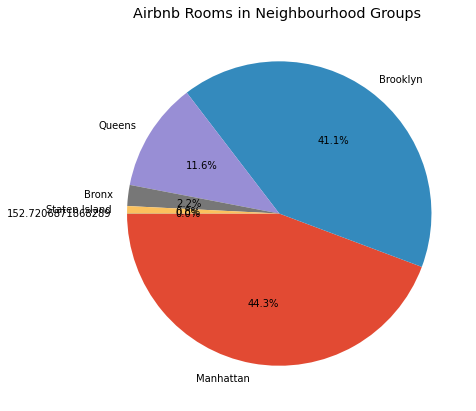

In [5]:
#rooms shares in each neighbourhood group 
plt.style.use('ggplot')
plt.figure(figsize=(13,7))
plt.title("Airbnb Rooms in Neighbourhood Groups ")
g = plt.pie(newdf.neighbourhood_group.value_counts(), labels=newdf.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

Here we can see that most number of rooms are in Manhattan and Brooklyn
followed by Queens, Staten Island and Bronx

Now lets check the room types in each neighbourhood groups

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


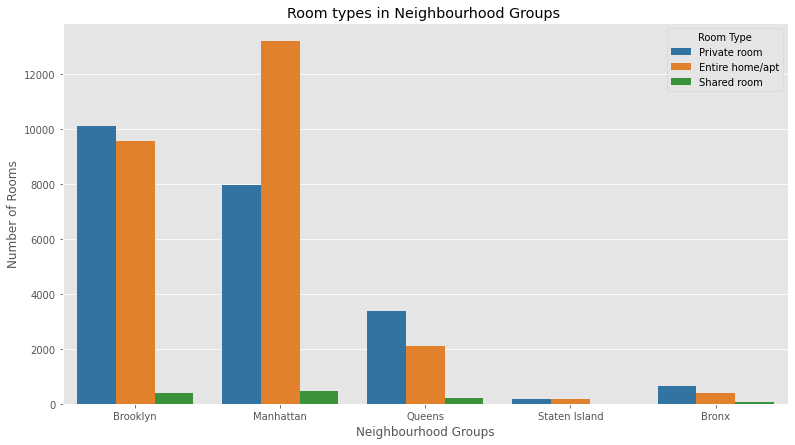

In [ ]:
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(newdf.neighbourhood_group,hue=newdf.room_type, palette="tab10")
plt.title("Room types in Neighbourhood Groups ")
plt.ylabel("Number of Rooms")
plt.xlabel("Neighbourhood Groups")
plt.legend(title='Room Type')
plt.show()

Here we can see Only in Manhattan Entire Rooms are 40% more than other room types.

It was about rooms basic information, now lets relove around some important factors that comes in mind while booking a room. 

Now lets find out the Average price of Rooms in each neighbourhood groups 

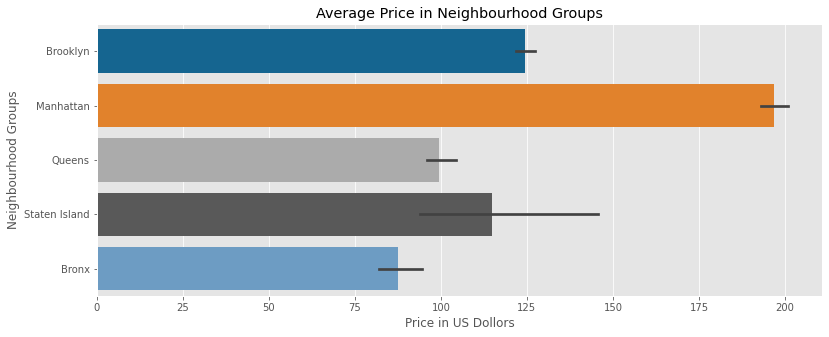

In [ ]:
plt.figure(figsize=(13,5))
plt.title("Room Type on Neighbourhood Group")
sns.barplot(y = 'neighbourhood_group', x = 'price',data = newdf)
plt.title("Average Price in Neighbourhood Groups")
plt.ylabel("Neighbourhood Groups")
plt.xlabel("Price in US Dollors")
plt.show()

Here we can see, that Manhatten holds the maximum average price despite of having maximum number of rooms and chart shows Staten Island has less percent of expensive rooms as it shows high ci.

So lets find that out.

In [ ]:
newdf[newdf["neighbourhood_group"]=="Staten Island"].describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,40.610225,-74.105805,114.812332,4.831099,30.941019,1.576381,2.319035,199.678284
std,0.032419,0.036400,277.620403,19.727605,44.830766,1.690710,1.915580,131.852000
min,40.499790,-74.244420,13.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.593720,-74.123930,50.000000,1.000000,1.000000,0.260000,1.000000,78.000000
50%,40.621540,-74.089300,75.000000,2.000000,12.000000,1.000000,1.000000,219.000000
75%,40.634740,-74.081070,110.000000,3.000000,42.000000,2.310000,3.000000,333.000000
max,40.647790,-74.060920,5000.000000,365.000000,333.000000,10.120000,8.000000,365.000000


Here we can see, 75% of rooms are priced less than 110 Dollors.

Now lets check average price of each room type.

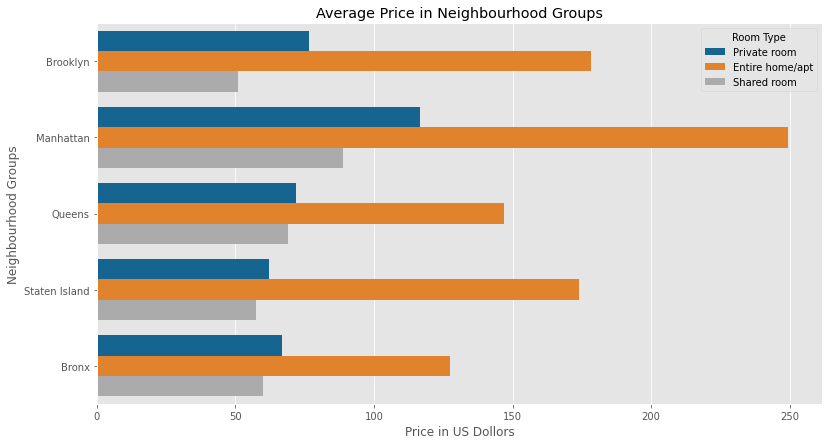

In [ ]:
#average room type price 
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.barplot(y = 'neighbourhood_group', x = 'price',hue= "room_type", data = newdf, ci = None)
plt.title("Average Price in Neighbourhood Groups")
plt.ylabel("Neighbourhood Groups")
plt.xlabel("Price in US Dollors")
plt.legend(title='Room Type')
plt.show()

Now lets check the map view

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


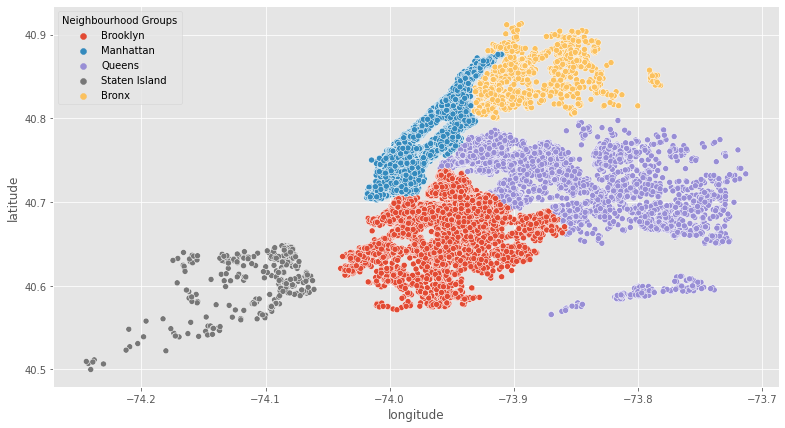

In [ ]:
#traffic in neighbourhood groups
plt.style.use('ggplot')
plt.figure(figsize=(13,7))
sns.scatterplot(newdf.longitude,newdf.latitude,hue=newdf.neighbourhood_group)
plt.legend(title='Neighbourhood Groups')

Here we can clearly see that Manhatten has very high density of rooms where as Staten Island has the lowest.

We can see that there is a noticeable difference in traffic in different areas. Manhattan and Brooklyn are more crowded compared to the others. Manhattan is the most visited place in New York City because of its tourist spots. It is one of the reason why they have the highest number of Airbnb listings. Brooklyn also is really famous for its tourist spots. Both areas are densely populated and hence has more number of properties to be listed as an Airbnb. These maybe the reasons why there is a difference in traffic in these two areas compared to the others.

Manhattend holds the maximum average price but lets check top neighbourhoods individually

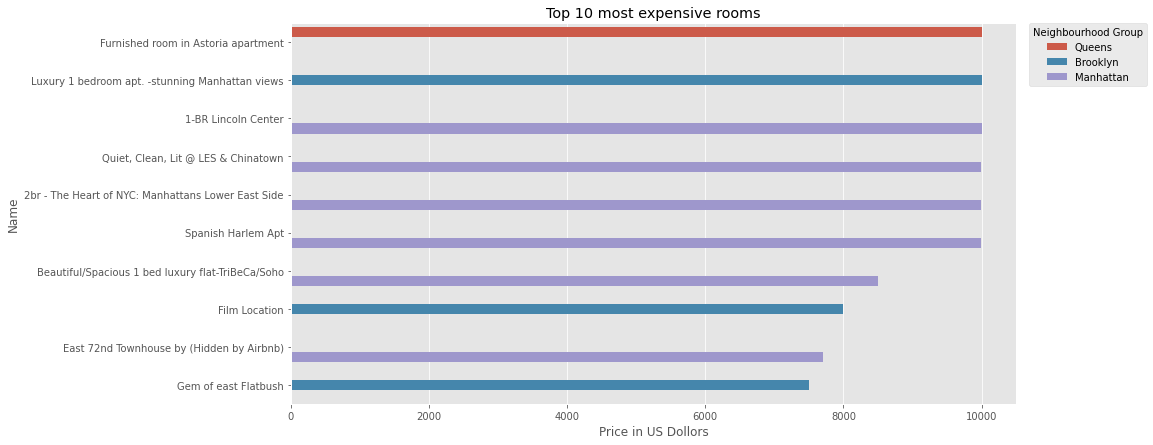

In [ ]:
#Top 10 most expensive rooms
Top_listings=newdf.groupby(["name","neighbourhood","neighbourhood_group"]).price.max().sort_values(ascending=False).head(10).reset_index()
plt.style.use('ggplot')
plt.figure(figsize=(13,7))
sns.barplot(y = 'name', x = 'price',hue= "neighbourhood_group", data = Top_listings)
plt.title("Top 10 most expensive rooms")
plt.ylabel("Name")
plt.xlabel("Price in US Dollors")
plt.legend(title='Neighbourhood Group', bbox_to_anchor=(1.18, 1), loc='upper right', borderaxespad=0)
plt.show()

Here we can see, that Manhatten holds 60% of top 10 most expensive rooms.

It was about pricing, but is it all about pricing, ofcourse not! So what does come in our mind while booking, we see the reviews and the host to maximize our comfort and convinience.

Now lets find out most reviewed hosts.

Text(0.5, 0, 'Number of Reviews/ Month')

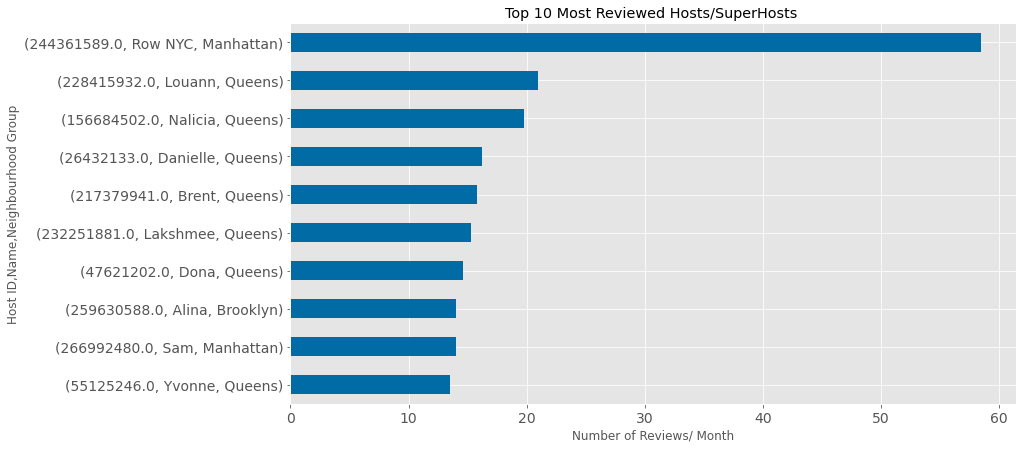

In [ ]:
#SuperHosts
super_hosts=newdf.groupby(["host_id","host_name","neighbourhood_group"])["reviews_per_month"].max().sort_values(ascending=False).head(10)
super_hosts.sort_values(ascending=True).plot.barh(figsize=(13,7),fontsize=14)
plt.style.use('ggplot')
plt.title("Top 10 Most Reviewed Hosts/SuperHosts ")
plt.ylabel("Host ID,Name,Neighbourhood Group")
plt.xlabel("Number of Reviews/ Month")

Here we observed that, Queens holds the maximum satisfaction of customer and shares 70% of superhosts

Text(0.5, 0, 'Average Minimum Nights Hosted')

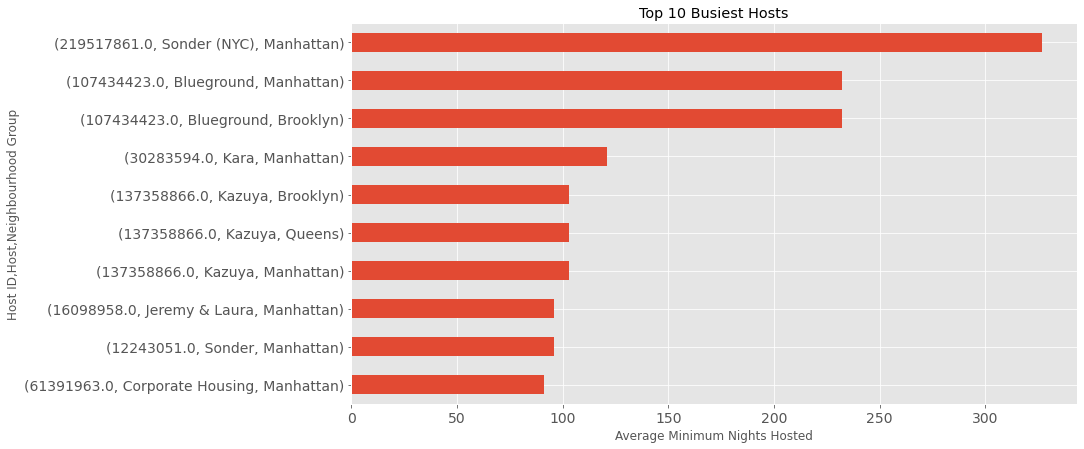

In [ ]:
# Top 10 Busiest Hosts
bussiest_host=newdf.groupby(["host_id","host_name","neighbourhood_group"])["calculated_host_listings_count"].max().sort_values(ascending=False).head(10)
bussiest_host.sort_values().plot.barh(figsize=(13,7),fontsize=14)
plt.style.use('tableau-colorblind10')
plt.title("Top 10 Busiest Hosts")
plt.ylabel("Host ID,Host,Neighbourhood Group")
plt.xlabel("Average Minimum Nights Hosted")

Manhatten has the maximum number of bussiest host top 10 list. 

Text(0.5, 0, 'Total Listings of Host')

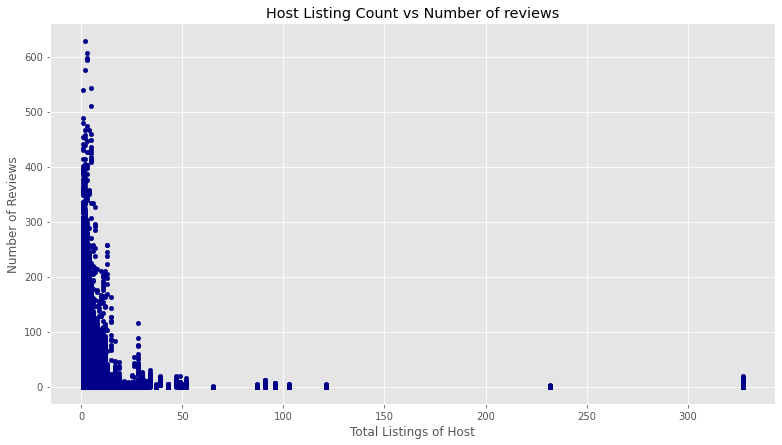

In [20]:
newdf.plot.scatter(x='calculated_host_listings_count', y='number_of_reviews',c='DarkBlue', figsize=(13, 7),
                              title = "Host Listing Count vs Number of reviews")
plt.style.use('tableau-colorblind10')
plt.ylabel("Number of Reviews")
plt.xlabel("Total Listings of Host")

As we can see from the plot, lesser the number of listings a host has higher the number of reviews they got. Hosts who has lesser listings under their name has only less number of listings to look after. Hence they can provide better service to their guests and are getting more reviews which will infact help them in getting more bookings.

Now lets check the impact of hosts listings on price

Text(0.5, 0, 'Total Listings of Host')

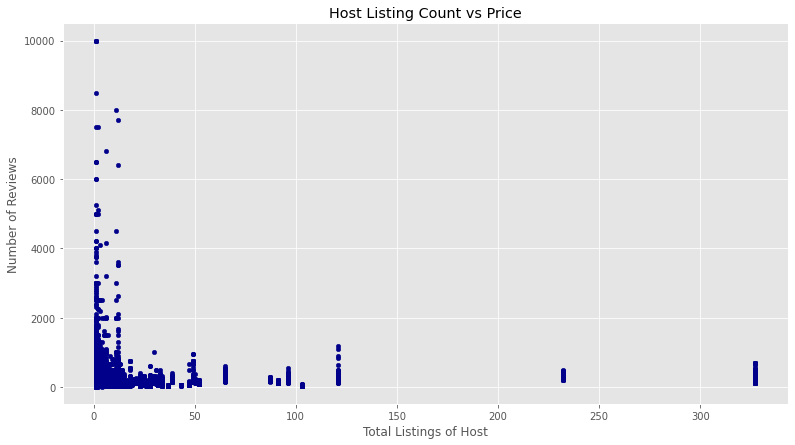

In [23]:
#Host Listing Count vs Price
newdf.plot.scatter(x='calculated_host_listings_count', y='price',c='DarkBlue', figsize=(13, 7),
                              title = "Host Listing Count vs Price")
plt.style.use('tableau-colorblind10')
plt.ylabel("Number of Reviews")
plt.xlabel("Total Listings of Host")

here we can see, more the number of listings lesser the price.

It was about hosts, now lets perform some operations on Reviews and availabilty of room types.

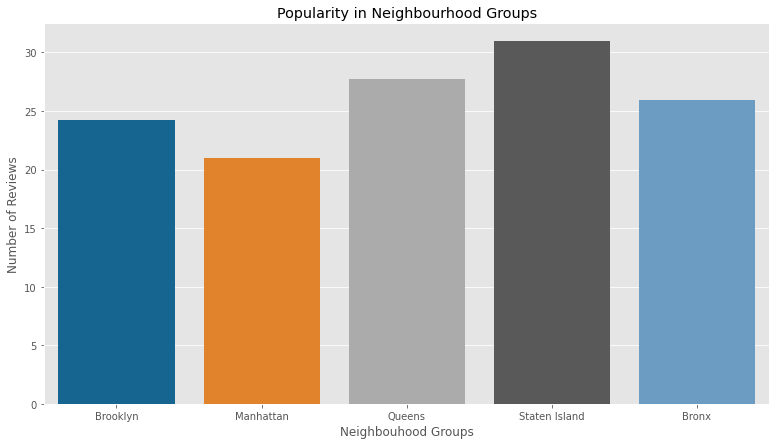

In [18]:
#popularity in neighbourhood groups
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.barplot(x = 'neighbourhood_group', y = 'number_of_reviews',ci=None, data = newdf)
plt.title("Popularity in Neighbourhood Groups")
plt.ylabel("Number of Reviews")
plt.xlabel("Neighbouhood Groups")
plt.show()

Staten island contains a lot of attractive destination for travellers which maybe the reason for the high demand for properties

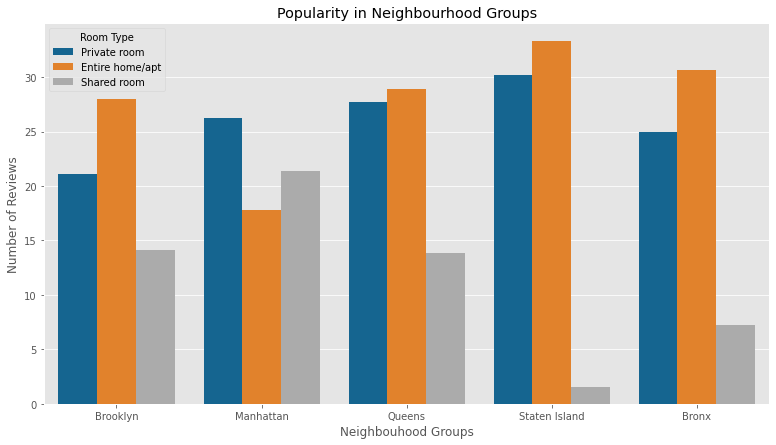

In [19]:
#popularity in neighbourhood groups
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.barplot(x = 'neighbourhood_group', y = 'number_of_reviews',hue= "room_type",ci=None, data = newdf)
plt.title("Popularity in Neighbourhood Groups")
plt.ylabel("Number of Reviews")
plt.xlabel("Neighbouhood Groups")
plt.legend(title='Room Type')
plt.show()

Interestlingly, entire homes/apartments are most polular in every neighbourhood but Manhatten, which has most expensive entire homes.

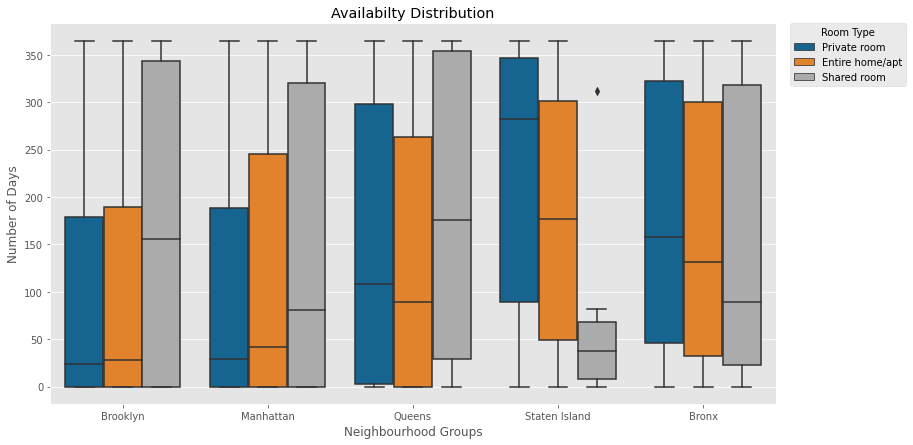

In [ ]:
#Availabity of room types in neighbourhood groups
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(13,7))
sns.boxplot(y="availability_365",x ='neighbourhood_group',hue="room_type" ,data = newdf)
plt.title("Availabilty Distribution")
plt.ylabel("Number of Days")
plt.xlabel("Neighbourhood Groups")
plt.legend(title='Room Type', bbox_to_anchor=(1.18, 1), loc='upper right', borderaxespad=0)
plt.show()

Shared rooms in Staten Island are only available 2 months throghout the year and brooklyn holds the the maximum availablity.

So here we come for conclusion. We have to find out the way of profitable business, so lets summarize everyting in heatmap to see the correlation between each important factors

Text(0.5, 1.0, 'Heatmap for NYC Airbnb')

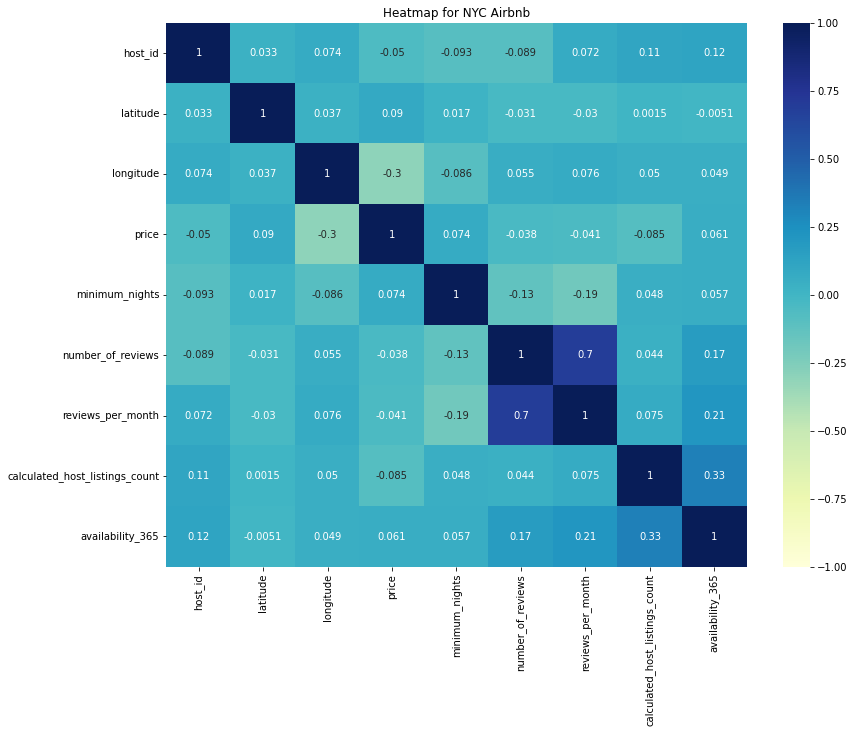

In [ ]:
#Corelation of parameters
plt.figure(figsize=(13,10))
sns.heatmap(newdf.corr(method='kendall'), cmap="YlGnBu", annot=True,vmin=-1,vmax=1)
plt.title('Heatmap for NYC Airbnb')

This chart does not provide us our desired information, so lets check with mean values.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 69.0, 'Mean Parameters')

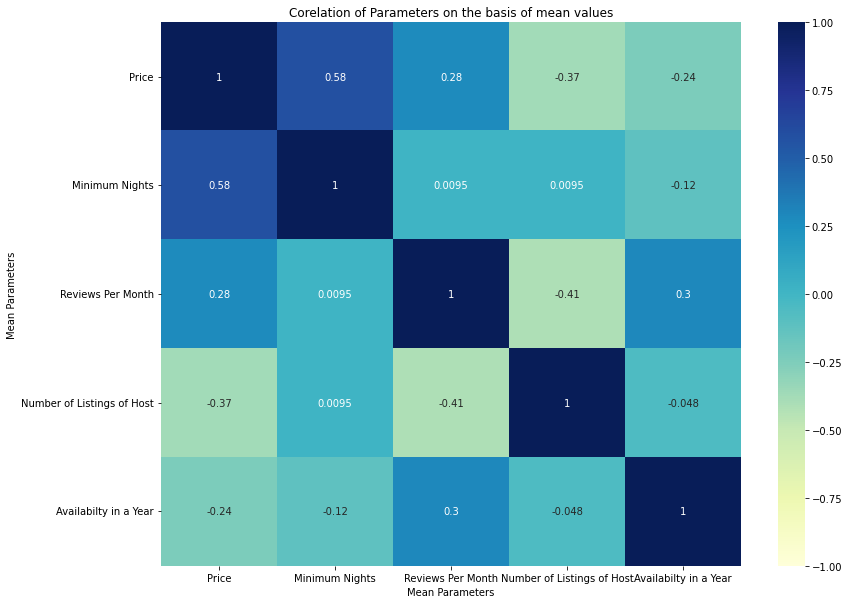

In [ ]:
#Corelation of Average Parameters
corr_df=newdf.groupby(["neighbourhood_group","room_type"])["price","minimum_nights","reviews_per_month","calculated_host_listings_count","availability_365"].agg(["mean"]).reset_index()
plt.figure(figsize=(13,10))
labels = ["Price","Minimum Nights","Reviews Per Month","Number of Listings of Host","Availabilty in a Year"]
sns.heatmap(corr_df.corr(method='kendall'),xticklabels=labels,yticklabels=labels, cmap="YlGnBu", annot=True,vmin=-1,vmax=1)
plt.title('Corelation of Parameters on the basis of mean values')
plt.ylabel("Mean Parameters")
plt.xlabel("Mean Parameters")

Here we can conclude that, price shows linear positive relation with minimum nights hosted, which means rooms which are high in demand are kept higher in price. 

bussiest hosts are not able to serve better as they got lesser reviews. 

Hosts with higher number of listings kept prices low that means they have lesser margins of each listings.

We can conclude that other factors are independent, that means the demand of rooms in Neighbourhood groups can be based on their popularity and population.